In [186]:
# Step 1: Import the function
from urllib.request import urlretrieve

# Step 2: Define the URL and download the CSV file
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')  # This saves the file as 'medical.csv' locally

# Step 3: Install pandas if not already installed (the ! runs a shell command)
!pip install pandas --quiet

# Step 4: Import pandas and read the CSV into a dataframe
import pandas as pd
medical_df = pd.read_csv('medical.csv')

# Step 5: Display the dataframe
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [187]:
!pip install plotly matplotlib seaborn --quiet

In [188]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [190]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [191]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [192]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [193]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey', 'yellow', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [194]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [195]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [196]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [197]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

In [198]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [199]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [200]:
import plotly.express as px

fig = px.violin(medical_df, 
                 x='smoker', 
                 y='charges', 
                 color='smoker', 
                 box=True, 
                 points='all', 
                 title='charges vs. smoker status')
fig.show()

/tmp/ipykernel_7287/3875255737.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




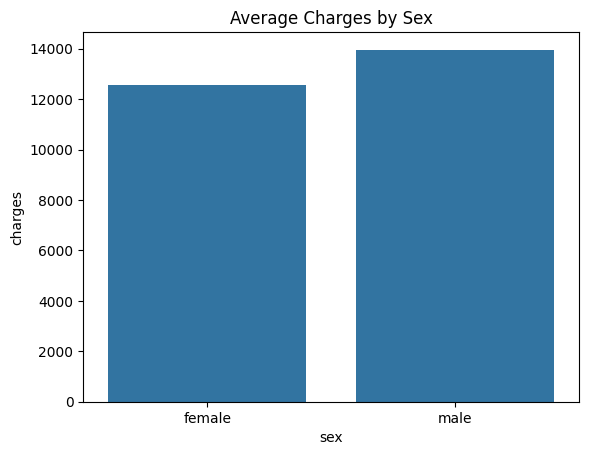

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sex', y='charges', data=medical_df, estimator='mean', ci=None)
plt.title('Average Charges by Sex')
plt.show()


In [202]:
fig = px.bar(medical_df.groupby('children')['charges'].mean().reset_index(),
             x='children',
             y='charges',
             title='Average Charges by Number of Children')
fig.show()


In [203]:
fig = px.violin(medical_df,
                x='region',
                y='charges',
                color='region',
                box=True,
                title='Charges Distribution Across Regions')
fig.show()


In [204]:
fig = px.box(medical_df,
             x='region',
             y='charges',
             color='smoker',
             title='Charges by Region and Smoking Status')
fig.show()


In [205]:
fig = px.violin(
    medical_df,
    x='age',
    y='charges',
    color='region',
    title='Age vs. Charges colored by BMI',
)
fig.show()

In [206]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [207]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [208]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [209]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [210]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [211]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [212]:
px.scatter(medical_df, x= 'age', y='age')

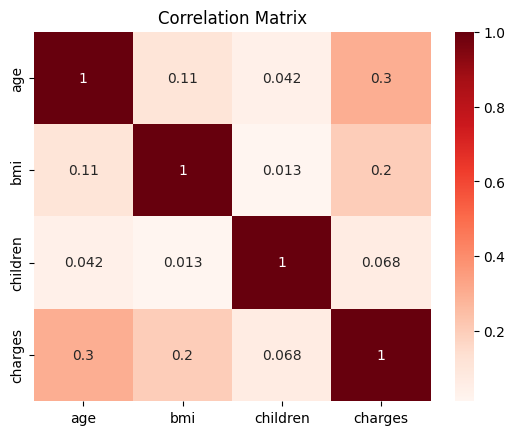

In [213]:
sns.heatmap(
    medical_df.corr(numeric_only=True), 
    cmap='Reds',
    annot=True)
plt.title('Correlation Matrix');

In [214]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

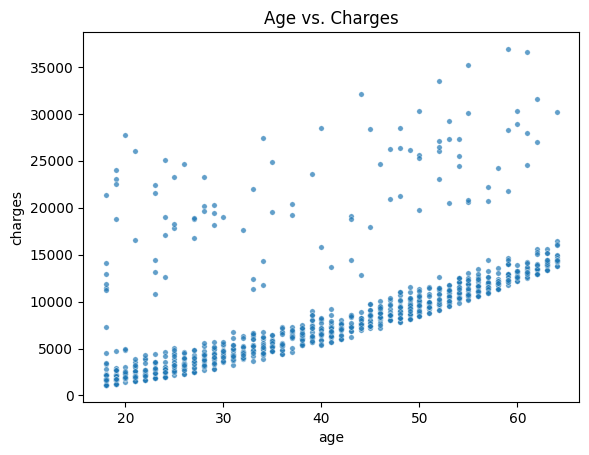

In [215]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [216]:
def estimate_charges(age, w, b):
    return w * age + b

In [217]:
w = 50
b = 100

In [218]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [219]:

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [220]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

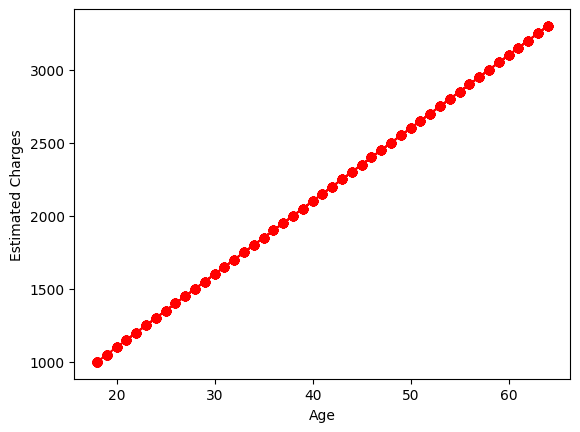

In [221]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

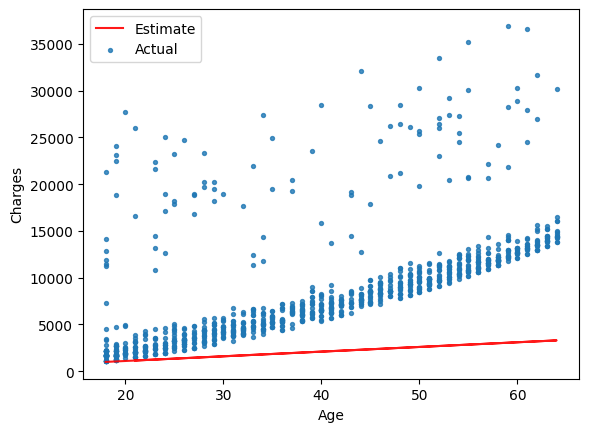

In [222]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [223]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

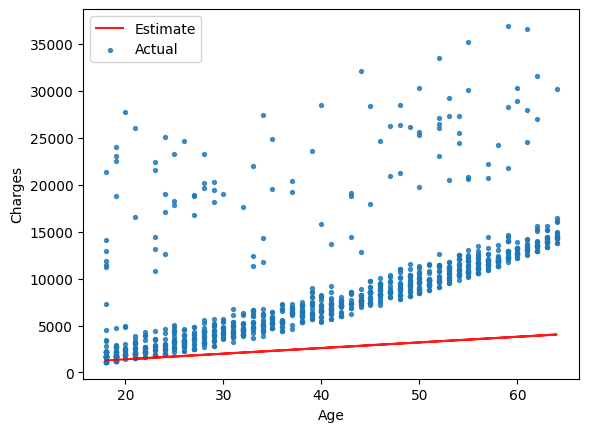

In [224]:
try_parameters(60, 200)

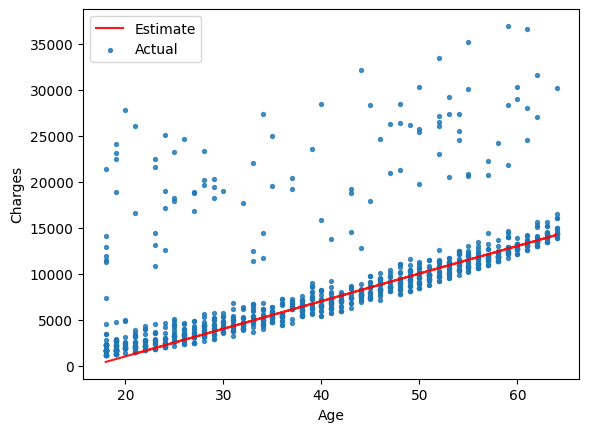

In [225]:
try_parameters(300, -5000)

In [226]:
!pip install numpy --quiet

import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

w = 50
b = 100

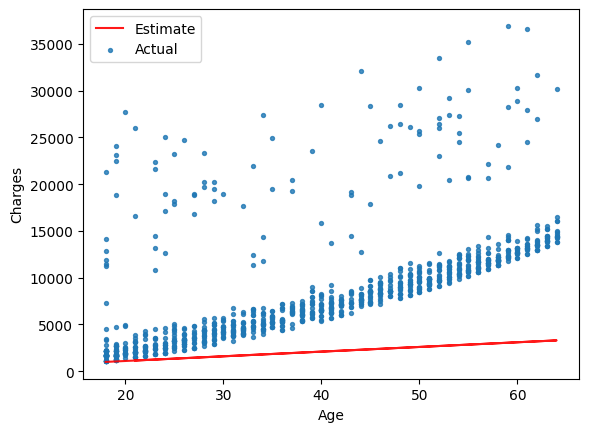

In [227]:
try_parameters(w, b)

In [228]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [229]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [230]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4818.589201659388


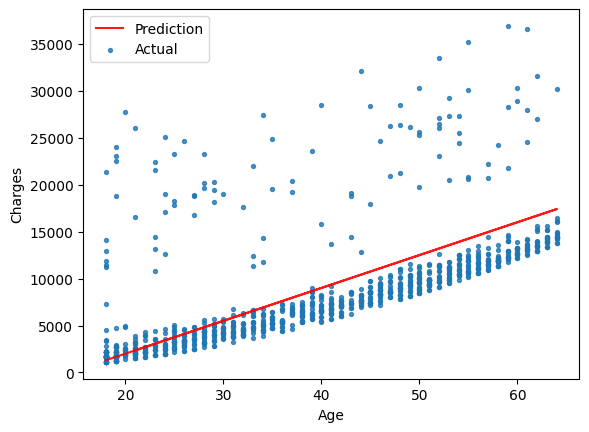

In [231]:
try_parameters(350, -5000)

In [232]:
!pip install scikit-learn --quiet

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
model = LinearRegression()

In [235]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [236]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [237]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [238]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/home/stanley-otieno/ML/jovian/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [239]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [240]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [241]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [242]:
# w
model.coef_

array([267.24891283])

In [243]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


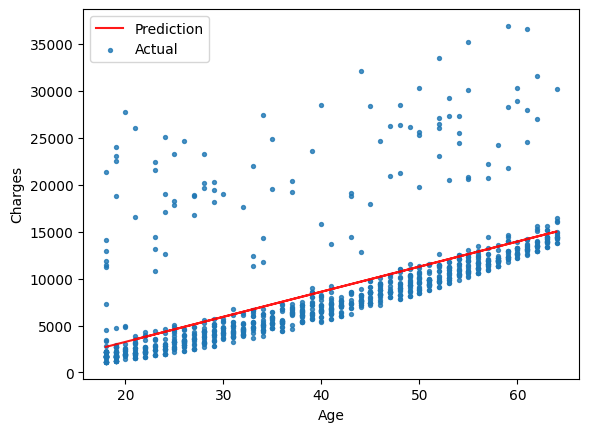

In [244]:
try_parameters(model.coef_, model.intercept_)

In [245]:
from sklearn.linear_model import SGDRegressor


In [246]:
# initialize default parameters
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

In [247]:
sgd_model.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [248]:
inputs = non_smoker_df[['age']]

In [249]:
targets = non_smoker_df['charges']

RMSE Loss:  4950.755108149788


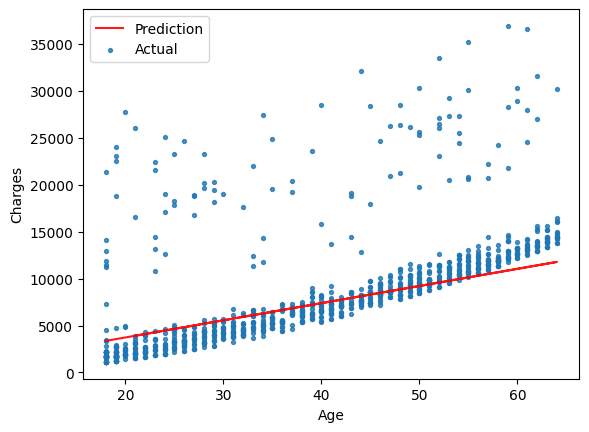

In [250]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

In [251]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [252]:
x_smoker = smoker_df[['age']]
y_smoker = smoker_df['charges']

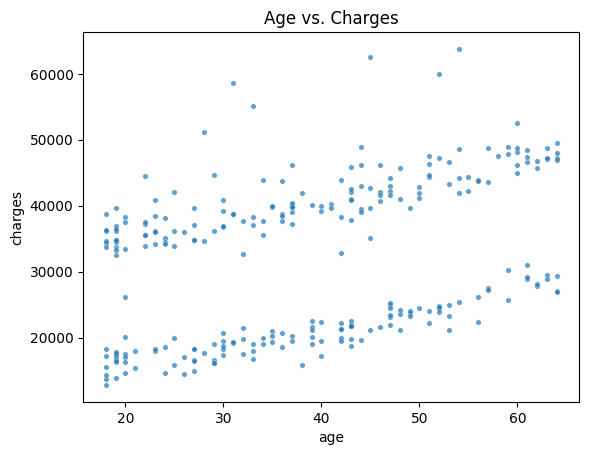

In [253]:
plt.title('Age vs. Charges')
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [254]:
ages = smoker_df.age
ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [255]:
ages = smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0       1050
11      3200
14      1450
19      1600
23      1800
        ... 
1313    1050
1314    1600
1321    3200
1323    2200
1337    3150
Name: age, Length: 274, dtype: int64

In [256]:
def try_smoker_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  12508.234243771329


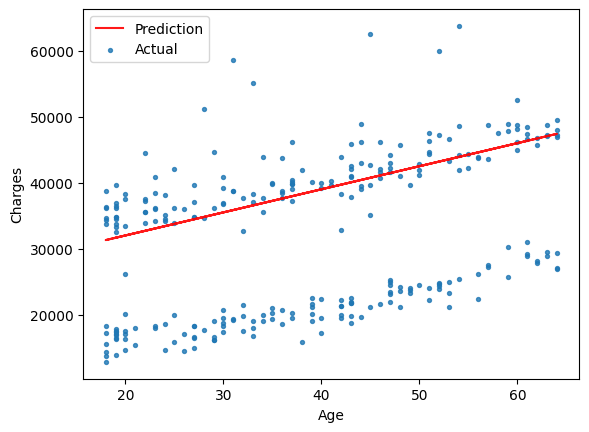

In [257]:
try_smoker_parameters(350, 25000)

In [258]:
smoker_inputs = x_smoker
smoker_targets = y_smoker
print('smoker.inputs.shape :', inputs.shape)
print('smoker.targes.shape :', targets.shape)

smoker.inputs.shape : (1064, 1)
smoker.targes.shape : (1064,)


In [259]:
!pip install scikit-learn --quiet

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
smoker_model = LinearRegression()

In [262]:
smoker_model.fit(x_smoker, y_smoker)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [263]:
help(smoker_model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [264]:
smoker_model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/home/stanley-otieno/ML/jovian/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [265]:
new_predictions = smoker_model.predict(smoker_inputs)
new_predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

RMSE Loss:  10711.00334810241


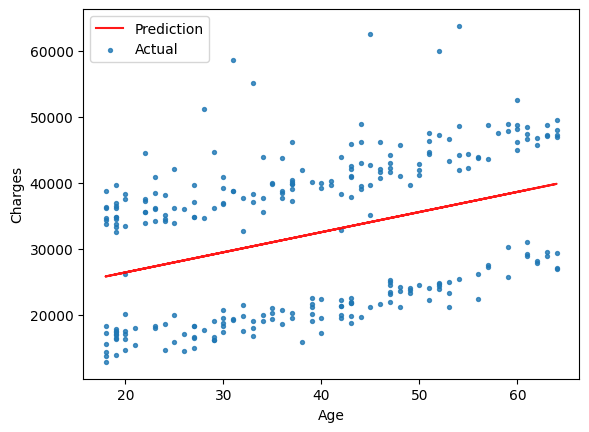

In [267]:
try_smoker_parameters(smoker_model.coef_, smoker_model.intercept_)

In [268]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [270]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [271]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [272]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [273]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [274]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [275]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [276]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [278]:
fig = px.strip(smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [291]:
# Create inputs and targets
two_D_inputs, two_D_targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
two_D_model = LinearRegression().fit(two_D_inputs, two_D_targets)

# Generate predictions
two_D_predictions = two_D_model.predict(two_D_inputs)

# Compute loss to evalute the model
loss = rmse(two_D_targets, two_D_predictions)
print('Loss:', loss)

Loss: 5718.202480524154


In [296]:
def try_smoker_parameters_2d(model, df):
    # Extract features and target from df
    X = df[['age', 'bmi', 'children']]
    y = df['charges']
    
    # Predict using the model
    predictions = model.predict(X)
    
    # Plot predicted vs actual
    plt.scatter(y, predictions, s=8, alpha=0.8)
    plt.plot([0, y.max()], [0, y.max()], 'r--', label='Perfect Prediction')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Predicted vs Actual Charges (Smokers)')
    plt.legend()
    plt.show()
    
    # Compute RMSE using y and predictions
    loss = rmse(y.values, predictions)
    print("RMSE Loss:", loss)


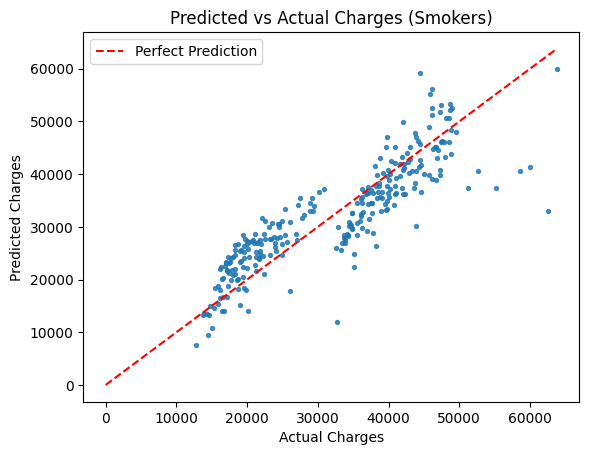

RMSE Loss: 5718.202480524154


In [297]:
try_smoker_parameters_2d(two_D_model, smoker_df)

In [298]:
print(len(smoker_df))
print(len(two_D_predictions))


274
274


In [299]:
#create all inputs and targets
all_inputs, all_targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
all_model = LinearRegression().fit(all_inputs, all_targets)

# Generate predictions
predictions = all_model.predict(all_inputs)

# Compute loss to evalute the model
loss = rmse(all_targets, predictions)
print('Loss:', loss)


Loss: 11355.317901125973


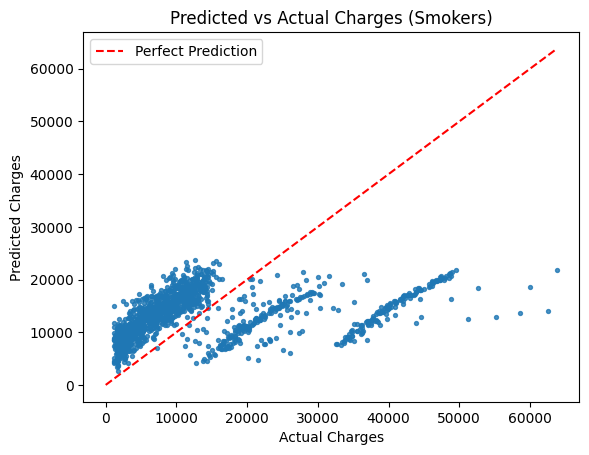

RMSE Loss: 11355.317901125973


In [300]:
try_smoker_parameters_2d(all_model, medical_df)

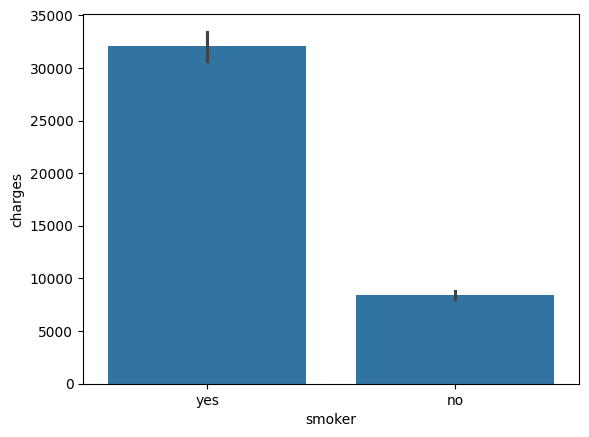

In [301]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [302]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df #observe smoker code is 0 and 1

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [303]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [305]:

#create all inputs and targets
all_inputs, all_targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
all_model = LinearRegression().fit(all_inputs, all_targets)

# Generate predictions
predictions = all_model.predict(all_inputs)

# Compute loss to evalute the model
loss = rmse(all_targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

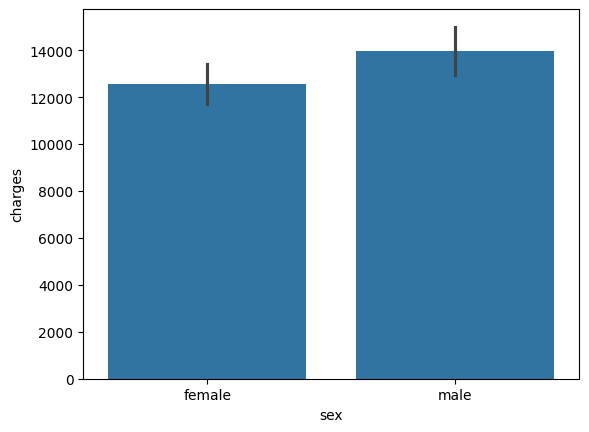

In [306]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [312]:

sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)


In [313]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [314]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [315]:

#create all inputs and targets
all_inputs, all_targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
all_model = LinearRegression().fit(all_inputs, all_targets)

# Generate predictions
predictions = all_model.predict(all_inputs)

# Compute loss to evalute the model
loss = rmse(all_targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

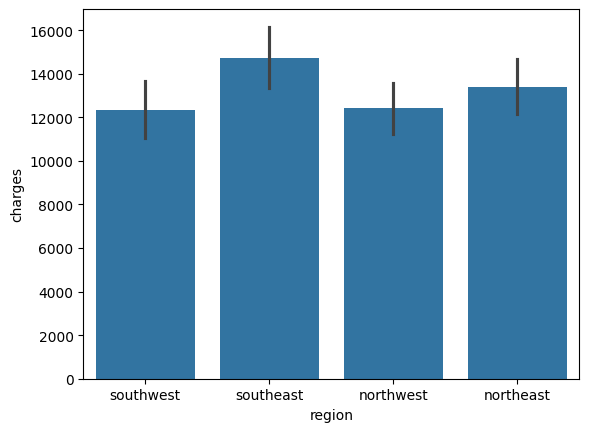

In [316]:
sns.barplot(data=medical_df, x='region', y='charges')

In [317]:
#how to use one hot encoding with scikit-learn

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
#converting regions using one hot encoding
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [319]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [320]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [340]:

#create all inputs and targets
all_inputs, all_targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code',]], medical_df['charges']

# Create and train the model
all_model = LinearRegression().fit(all_inputs, all_targets)

# Generate predictions
predictions = all_model.predict(all_inputs)

# Compute loss to evalute the model
loss = rmse(all_targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [325]:
all_model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [328]:
model.intercept_

np.float64(-22556.088196491593)

In [330]:
weights_df = pd.DataFrame({
    'feature': np.append(all_inputs.columns, 'intercept'),
    'weight': np.append(all_model.coef_, all_model.intercept_)
})
weights_df


,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northwest,-352.963899
6,southeast,-1035.022049
7,southwest,-960.050991
8,intercept,-11938.538576


In [331]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [332]:
from sklearn.preprocessing import StandardScaler

In [333]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [334]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
#variance(square of the standard deviation)
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [336]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [344]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [345]:

all_inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)

all_targets = medical_df.charges
# Create and train the model
all_model = LinearRegression().fit(all_inputs, all_targets)

# Generate predictions
predictions = all_model.predict(all_inputs)

# Compute loss to evalute the model
loss = rmse(all_targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [348]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1 ),
    'weight': np.append(all_model.coef_, all_model.intercept_)
})
weights_df.sort_values(by='weight', ascending=False)


,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [349]:
from sklearn.model_selection import train_test_split

In [351]:

# Split your processed dataset (already with smoker_code, sex_code, regions, etc.)
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    all_inputs, all_targets, test_size=0.1, random_state=42
)

# Train model
final_model = LinearRegression().fit(inputs_train, targets_train)

# Evaluate on test set
predictions_test = final_model.predict(inputs_test)
test_loss = rmse(targets_test, predictions_test)
print("✅ Test Loss:", test_loss)

# Evaluate on training set
predictions_train = final_model.predict(inputs_train)
train_loss = rmse(targets_train, predictions_train)
print("✅ Training Loss:", train_loss)

✅ Test Loss: 5681.183886386302
✅ Training Loss: 6082.272151066889
